In [6]:
# Vraag 2 – Data Science 2 examen (5 punten)
# 
# De CSV’s inzamelingenGFT.csv, inzamelingenRest.csv en inzamelingenPapier.csv 
# werden gedownload van de site van het bedrijf dat de afvalophaling doet bij docent 'Jan' thuis.
# In de betreffende gemeente worden ‘GFT’ (groenten, fruit en tuinafval), ‘Restafval’ en ‘Papier’ 
# opgehaald in containers. Bij de ophaling worden sensoren gebruikt om het nettogewicht van de container te wegen.
# 
# Volgende kolommen zijn aanwezig in de CSV’s:
# 1. Tijdsindicatoren: Jaar, Maand, Dag en Week
# 2. Verwerkings codes: Geeft aan hoe het afval verwerkt wordt. 
#    Er zijn slechts een beperkt aantal codes die gebruikt worden.
# 3. Gewicht (kg): het effectief gewogen lediging in kg
# 4. Eural codes: Europese vastgelegde codes die het type afval beschrijven:
#    150101 = ‘Papier en karton’, 200108 = ‘GFT’, 200301 = ‘Restafval’
#
# Maak een script dat de bestanden inleest en de nodige dataprocessing uitvoert op basis van onderstaande vereisten:
#
# a) Het script moet automatisch uitgevoerd kunnen worden op bestanden met dezelfde structuur.
# b) Je maakt geen gebruik van for-loops, while of list comprehensions. Gebruik vectorisatie.
# c) Gebruik efficiënte verwerkingsmethoden van Pandas/Numpy.
#    Minimaliseer het geheugengebruik van de dataframe door een verstandige keuze van datatypes.
#    Tip: Categorische data kan je het efficiëntst opslaan met behulp van het category datatype.
# d) -9 kg wil zeggen dat er voor die ophaling geen weging heeft plaatsgevonden. Vervang deze waarden door NaN.
# e) Als er bij GFT-afval geen weging heeft plaatsgevonden dan is dat omwille van een defect van de weegschaal.
#    Zorg ervoor dat die ontbrekende waarden vervangen worden door het gewicht van de voorgaande ophaling van GFT.
# f) De informatie tussen haakjes bij ‘Verwerkings codes’ is niet relevant. Haal deze weg.
# g) Voeg de kolom ‘kostprijs’ toe op volgende manier:
#    GFT: 0.21 euro/kg
#    Restafval: 0.31 euro/kg + 0.65 euro per lediging
#    Papier: 0.4 euro per lediging
# h) Voeg de 3 dataframes samen tot 1 dataframe met alle informatie met behulp van de concat() methode.

In [7]:
import pandas as pd
import numpy as np 

In [8]:
gft = pd.read_csv("inzamelingenGFT.csv", sep=";")
rest = pd.read_csv("inzamelingenRest.csv", sep=";")
papier = pd.read_csv("inzamelingenPapier.csv", sep=";")

In [9]:
dtype_convert = {
    "Verwerkings codes": "category",
    "Eural codes": "category",
    "Maand": "int8",
    "Jaar": "int16",
    "Dag": "int8",
    "Week": "int8"
}

gft = gft.astype(dtype_convert)
rest = rest.astype(dtype_convert)
papier = papier.astype(dtype_convert)

In [10]:
gft["Gewicht (kg)"] = pd.to_numeric(gft["Gewicht (kg)"], errors="coerce").replace(-9, np.nan)
rest["Gewicht (kg)"] = pd.to_numeric(rest["Gewicht (kg)"], errors="coerce").replace(-9, np.nan)
papier["Gewicht (kg)"] = pd.to_numeric(papier["Gewicht (kg)"], errors="coerce").replace(-9, np.nan)

In [11]:
gft["Gewicht (kg)"] = gft["Gewicht (kg)"].fillna(method="ffill")


/var/folders/4n/z403ds5x0n141m695xdfdlcm0000gn/T/ipykernel_6790/82898771.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gft["Gewicht (kg)"] = gft["Gewicht (kg)"].fillna(method="ffill")


In [12]:
gft["Verwerkings codes"] = gft["Verwerkings codes"].str.replace(r"\s*\(.*\)", "", regex=True)
rest["Verwerkings codes"] = rest["Verwerkings codes"].str.replace(r"\s*\(.*\)", "", regex=True)
papier["Verwerkings codes"] = papier["Verwerkings codes"].str.replace(r"\s*\(.*\)", "", regex=True)

In [13]:
gft["kostprijs"] = gft["Gewicht (kg)"] * 0.21
rest["kostprijs"] = rest["Gewicht (kg)"] * 0.31 + 0.65
papier["kostprijs"] = 0.4  # vast bedrag per lediging

In [14]:
gft["type"] = "GFT"
rest["type"] = "Restafval"
papier["type"] = "Papier"

In [15]:
df_alles = pd.concat([gft, rest, papier], ignore_index=True)

In [18]:
df_alles.head()

,Gewicht (kg),Eural codes,Verwerkings codes,Maand,Jaar,Dag,Week,kostprijs,type
0,NaN,200108,Composteren,2,2025,14,7,NaN,GFT
1,NaN,200108,Composteren,1,2025,31,5,NaN,GFT
2,NaN,200108,Composteren,1,2025,17,3,NaN,GFT
3,NaN,200108,Composteren,1,2025,3,1,NaN,GFT
4,NaN,200108,Composteren,12,2024,20,51,NaN,GFT


In [19]:
# Vraag 3b – Data Science 2 examen (6 punten)
#
# b) Bouw onderstaande grafiek na (6p)
# De grafiek moet er precies hetzelfde uitzien zoals de afbeelding. 
# Vertrek hierbij van de CSV inzamelingenALL.csv.
# De jaren 2020 en 2025 zijn niet meegenomen in de resultaten omdat de data daarvan niet volledig was.
#
# Zoals je merkt zal je eerst de data uit de CSV in het juiste formaat moeten omzetten. 
# Als het je niet lukt om de data te transformeren naar het juiste formaat voor de visualisatie 
# dan kan je er voor kiezen om de ‘commented’ getransformeerde dataframes in het examenbestand te gebruiken.
# Dit kost je 3 punten. Laat in elk geval je poging tot transformatie staan omdat een gedeeltelijke oplossing toch nog punten kan opleveren.
#
# Tip1: Als je halve jaartallen ziet op de x-as gebruik dan de functie plt.xticks()
# Tip2: Als je een zwart thema gebruikt in PyCharm zie je inverse kleuren. 
#       Ga naar File > Settings > Zoek “invert image outputs for dark themes” en disable dit om de juiste kleuren te krijgen.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Inlezen met correcte decimale scheiding
df_all = pd.read_csv("inzamelingenALL.csv", sep=";", decimal=",")

NameError: name 'pd' is not defined

In [3]:
# Converteren naar juiste types
df_all["Gewicht (kg)"] = pd.to_numeric(df_all["Gewicht (kg)"], errors="coerce")
df_all["kostprijs"] = pd.to_numeric(df_all["kostprijs"], errors="coerce")

NameError: name 'pd' is not defined

In [23]:
# Filter jaren tussen 2021 en 2024
df_all = df_all[df_all["Jaar"].between(2021, 2024)]

In [28]:
# Eerst alle kolomnamen strippen voor veiligheid
df_all.columns
df_all.columns = df_all.columns.str.strip()

In [29]:
# Filter per type afval obv 'Verwerkings codes'
gft = df_all[df_all["Verwerkings codes"] == 135]     # pas dit aan indien andere code
papier = df_all[df_all["Verwerkings codes"] == 237]
rest = df_all[df_all["Verwerkings codes"] == 126]

In [30]:
gft["Fractie"] = "GFT"
papier["Fractie"] = "Papier"
rest["Fractie"] = "Restafval"

In [31]:
df = pd.concat([gft, papier, rest])


In [32]:
df_per_jaar = df.groupby(["Jaar", "Fractie"])["kostprijs"].sum().reset_index()


In [33]:
# Filter de gewichten > 0
gewichten = df_all["Gewicht (kg)"]
gewichten = gewichten[gewichten > 0]

(array([ 6.73076923, 11.53846154, 14.42307692, 14.42307692, 12.5       ,
         9.61538462,  8.65384615,  6.73076923, 10.57692308,  2.88461538,
         0.96153846,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.96153846]),
 array([ 2.5 ,  4.05,  5.6 ,  7.15,  8.7 , 10.25, 11.8 , 13.35, 14.9 ,
        16.45, 18.  , 19.55, 21.1 , 22.65, 24.2 , 25.75, 27.3 , 28.85,
        30.4 , 31.95, 33.5 ]),
 <BarContainer object of 20 artists>)

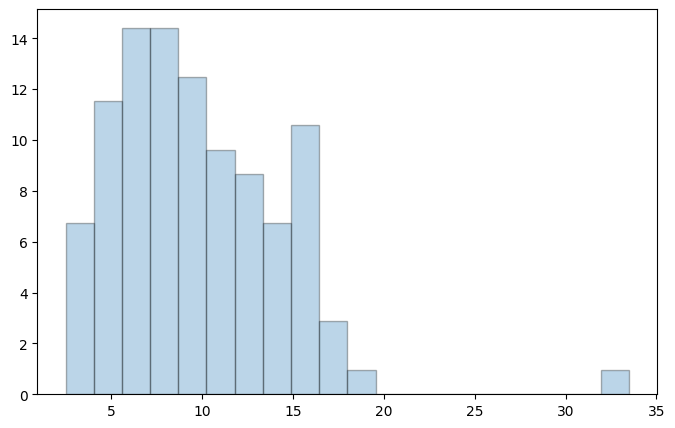

In [34]:
# Histogram plotten
plt.figure(figsize=(8, 5))
plt.hist(gewichten, bins=20, alpha=0.3, edgecolor='black', weights=[100/len(gewichten)]*len(gewichten))

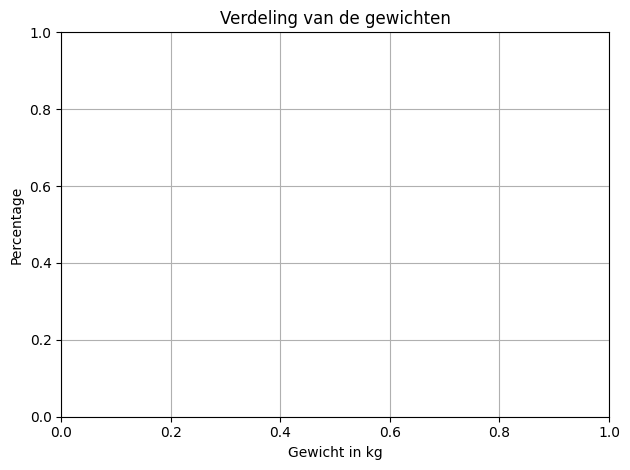

In [35]:
plt.title("Verdeling van de gewichten")
plt.xlabel("Gewicht in kg")
plt.ylabel("Percentage")
plt.grid(True)
plt.tight_layout()
plt.show()

In [1]:
import matplotlib.pyplot as plt

# Stap 1: Filter alleen gewichten > 0
gewichten = df_all["Gewicht (kg)"]
gewichten = gewichten[gewichten > 0]

# Stap 2: Plot histogram met percentages
plt.figure(figsize=(8, 5))
plt.hist(gewichten, bins=20, alpha=0.3, edgecolor='black', weights=[100/len(gewichten)] * len(gewichten))

# Stap 3: Labels toevoegen
plt.title("Verdeling van de gewichten")
plt.xlabel("Gewicht in kg")
plt.ylabel("Percentage")
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'df_all' is not defined